## Load Breast Cancer Dataset

In [942]:
from sklearn.datasets import load_breast_cancer #import module

print(load_breast_cancer().DESCR) #akses description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Dataset ini terdiri dari :
* 569 Instances(data)
* Attributes : 30 numeric (30 nilai numerik sebagai features/kolomnya)
* Attribut Information : keterangan terkait featuresnya
* 2 class : Malignant - Benign
* Missing Attributes : none (tidak terdapat missing value atau nilai yang kosong)
* Class Distribution (proporsi kelas) : 212 Malignant , 357 Benign

In [943]:
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

## 01 Binary Classification

Kita akan menerapkan Binary Classification untuk melakukan klasifikasi data pada dataset breast cancer yang kita miliki

In [944]:
from sklearn.model_selection import train_test_split #Import module

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25, #porsi untuk testing datasetnya adalah 25%,dan sisa 75%nya untuk training set
                                                    random_state=0) 

print(f'X train: {X_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y train: {y_train.shape}')
print(f'y test: {y_test.shape}')

X train: (426, 30)
X test: (143, 30)
y train: (426,)
y test: (143,)


In [945]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

for pred, breast_cancer in zip(y_pred[:5], X_test[:5]):
    print(f'PRED: {pred} - breast_cancer: {breast_cancer}\n')

PRED: 0 - breast_cancer: [1.340e+01 2.052e+01 8.864e+01 5.567e+02 1.106e-01 1.469e-01 1.445e-01
 8.172e-02 2.116e-01 7.325e-02 3.906e-01 9.306e-01 3.093e+00 3.367e+01
 5.414e-03 2.265e-02 3.452e-02 1.334e-02 1.705e-02 4.005e-03 1.641e+01
 2.966e+01 1.133e+02 8.444e+02 1.574e-01 3.856e-01 5.106e-01 2.051e-01
 3.585e-01 1.109e-01]

PRED: 1 - breast_cancer: [1.321e+01 2.525e+01 8.410e+01 5.379e+02 8.791e-02 5.205e-02 2.772e-02
 2.068e-02 1.619e-01 5.584e-02 2.084e-01 1.350e+00 1.314e+00 1.758e+01
 5.768e-03 8.082e-03 1.510e-02 6.451e-03 1.347e-02 1.828e-03 1.435e+01
 3.423e+01 9.129e+01 6.329e+02 1.289e-01 1.063e-01 1.390e-01 6.005e-02
 2.444e-01 6.788e-02]

PRED: 1 - breast_cancer: [1.402e+01 1.566e+01 8.959e+01 6.065e+02 7.966e-02 5.581e-02 2.087e-02
 2.652e-02 1.589e-01 5.586e-02 2.142e-01 6.549e-01 1.606e+00 1.925e+01
 4.837e-03 9.238e-03 9.213e-03 1.076e-02 1.171e-02 2.104e-03 1.491e+01
 1.931e+01 9.653e+01 6.889e+02 1.034e-01 1.017e-01 6.260e-02 8.216e-02
 2.136e-01 6.710e-02]

PRED

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [946]:
from sklearn.linear_model import LogisticRegression

binary = LogisticRegression()

binary.fit(X_train, y_train)

binary.score(X_test, y_test)

y_pred = binary.predict(X_test)
print(f'Performance : {binary.score(X_test, y_test)}')

Performance : 0.9440559440559441


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


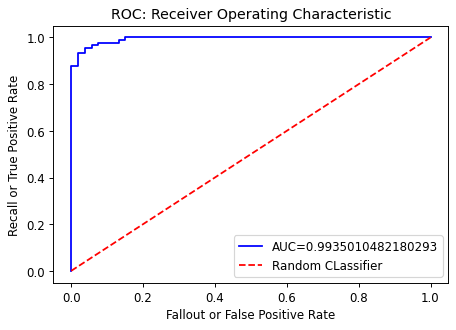

In [947]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(X_test)

fpr, tpr, threshhold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random CLassifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

## 02 Naive Bayes Classification

Kita akan menerapkan Naive Bayes untuk melakukan klasifikasi data pada dataset breast cancer yang kita miliki

In [948]:
from sklearn.model_selection import train_test_split #import module

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% dari dataset kita akan kita alokasikan untuk testing dataset,sedangkan 80%nya akan kita gunakan sebagai training dataset
                                                    random_state=0)

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')

X_train shape (455, 30)
X_test shape (114, 30)


### Accuracy Score

In [949]:
from sklearn.naive_bayes import GaussianNB #NB=Naive Bayes
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train) #method fit
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9298245614035088

In [950]:
model.score(X_test, y_test)

0.9298245614035088

In [951]:
from sklearn.naive_bayes import GaussianNB

naivebayes = GaussianNB()

naivebayes.fit(X_train, y_train)

print(f' Performance : {naivebayes.score(X_test, y_test)}')

 Performance : 0.9298245614035088


### Visualisasi Model

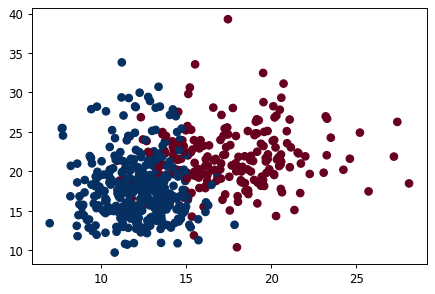

In [952]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

### Evaluasi Model

Kita akan melakukan evaluasi performa dengan memanfaatkan classification report

In [953]:
from sklearn.metrics import classification_report #import module

y_pred = model.predict(X_test) #prediksi

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## 03 Support Vector Machine (SVM) Classification

Kita akan menerapkan Support Vector Machine untuk melakukan klasifikasi data pada dataset breast cancer yang kita miliki

In [954]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [955]:
from sklearn.svm import SVC

supportvector = SVC(random_state=0, probability=True, kernel = 'linear')

supportvector.fit(X_test, y_test)

print(supportvector.score(X_test, y_test))

0.9824561403508771


In [956]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



### Predict

In [957]:
y_pred = model.predict(X_test)

### Visualisasi Model

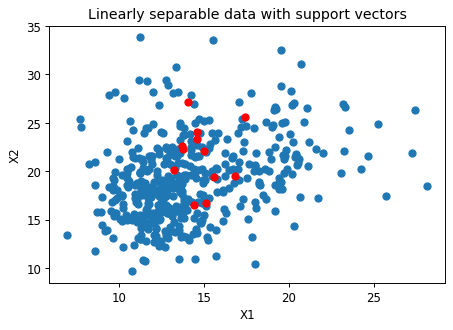

In [958]:
support_vectors = supportvector.support_vectors_
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Evaluasi Model

Kita akan melakukan evaluasi performa dengan memanfaatkan classification report

In [959]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.90      0.99      0.94        67

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



## 04 Decision Tree Classification

Kita akan menerapkan Decision Tree untuk melakukan klasifikasi data pada dataset breast cancer yang kita miliki

In [960]:
from sklearn.model_selection import train_test_split #import module

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, #testing set akan menempati 30% dari total keseluruhan dataset
                                                    random_state=0)

In [961]:
from sklearn.tree import DecisionTreeClassifier #import module

model = DecisionTreeClassifier(max_depth=4) #max_depth = decision tree classifier yang kita hasilkan memiliki kedalaman maksimum 4 layer

model.fit(X_train, y_train) #method fit

DecisionTreeClassifier(max_depth=4)

In [962]:
from sklearn import tree

decisiontree = DecisionTreeClassifier(max_depth=4)

decisiontree.fit(X_train, y_train)

decisiontree.score(X_test, y_test)

y_pred = decisiontree.predict(X_test)
print(f'Performance : {decisiontree.score(X_test, y_test)}')

Performance : 0.9415204678362573


### Visualisasi Model

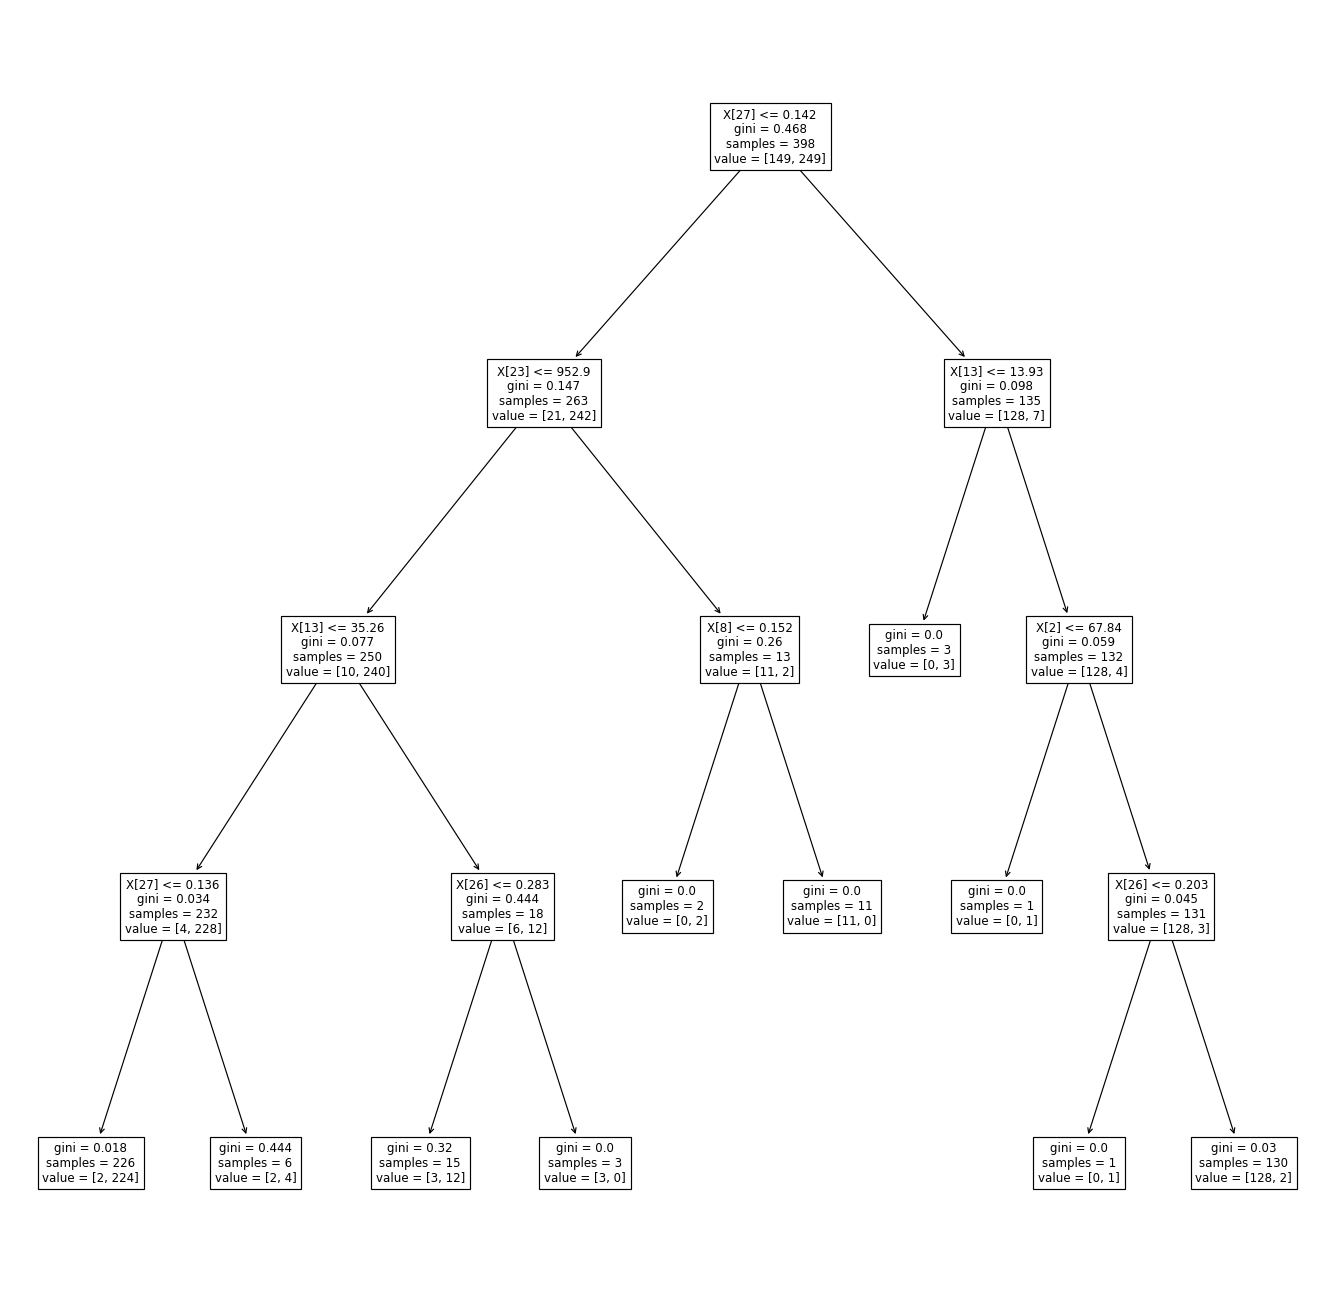

In [963]:
import matplotlib.pyplot as plt #import module
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(20, 20))
tree.plot_tree(model, fontsize=10)
plt.show()

### Evaluasi Model

Kita akan melakukan evaluasi performa dengan memanfaatkan classification report

In [964]:
from sklearn.metrics import classification_report #import module

y_pred = model.predict(X_test) #prediksi

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        63
           1       0.96      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## 05 Random Forest Classification

Kita akan menerapkan Random Forest untuk melakukan klasifikasi data pada dataset breast cancer yang kita miliki

In [965]:
from sklearn.model_selection import train_test_split #import module

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, #testing set akan menempati 30% dari total keseluruhan dataset
                                                    random_state=0) #menjamin agar eksperimen kita ini bisa kita replicate dan menghasilkan nilai yang konsisten

In [966]:
model.score(X_test, y_test)

0.9415204678362573

In [967]:
from sklearn import ensemble

randomforest = ensemble.RandomForestClassifier(n_estimators = 50,
                                        random_state = 0)

randomforest.fit(X_train, y_train)

print(f'Performance : {randomforest.score(X_train, y_train)}')

Performance : 0.9974874371859297


### Evaluasi Model

Kita akan melakukan evaluasi performa dengan memanfaatkan classification report

In [968]:
from sklearn.metrics import classification_report #import module

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        63
           1       0.96      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Five Classification Model

In [969]:
binary_prob = binary.predict_proba(X_test)
supportvector_prob = supportvector.predict_proba(X_test) 
naivebayes_prob = naivebayes.predict_proba(X_test) 
decisiontree_prob = decisiontree.predict_proba(X_test)
randomforest_prob = randomforest.predict_proba(X_test)

binary = binary_prob[:, 1]
supportvector = supportvector_prob[:, 1]
naivebayes = naivebayes_prob[:, 1]
decisiontree = decisiontree_prob[:, 1]
randomforest = randomforest_prob[:, 1]

binary_auc = roc_auc_score(y_test, binary)
supportvector_auc = roc_auc_score(y_test, supportvector)
naivebayes_auc = roc_auc_score(y_test, naivebayes)
decisiontree_auc = roc_auc_score(y_test, decisiontree)
randomforest_auc = roc_auc_score(y_test, randomforest)

print(F'Key Binary Classification (BC) AUROC Value = {binary_auc}')
print(F'Support Vector Machine (SVM) AUROC Value = {supportvector_auc}')
print(F'Naive Bayes AUROC Value = {naivebayes_auc}')
print(F'Desicion Tree AUROC Value = {decisiontree_auc}')
print(F'Random Forest AUROC Value = {randomforest_auc}')

binary_fpr, binary_tpr, _ = roc_curve(y_test, binary)
supportvector_fpr, supportvector_tpr, _ = roc_curve(y_test, supportvector)
naivebayes_fpr, naivebayes_tpr, _ = roc_curve(y_test, naivebayes)
decisiontree_fpr, decisiontree_tpr, _ = roc_curve(y_test, decisiontree)
randomforest_fpr, randomforest_tpr, _ = roc_curve(y_test, randomforest)

Key Binary Classification (BC) AUROC Value = 0.9948559670781894
Support Vector Machine (SVM) AUROC Value = 0.9976484420928866
Naive Bayes AUROC Value = 0.9880952380952381
Desicion Tree AUROC Value = 0.9318048206937097
Random Forest AUROC Value = 0.9963256907701352


* ROC Curve pada dasarnya membandingkan dua buah parameter yaitu True Positive Rate akan dibandingkan dengan False Positive Rate
* Pada umumnya ROC Curve menampilkan garis linear diagonal (garis warna merah) dan garis ini menrepresentasikan random classifier
* Berdasarkan hasil visualiasi dari ROC Curve,ketika hasil plotting dari suatu model makin mengarah ke sisi kiri atas maka performanya akan dinilai semakin baik sedangkan ketika plotting modelnya semakin mengarah ke sudut kanan bawah maka model tersebut bisa dipandang sebagai model yang buruk

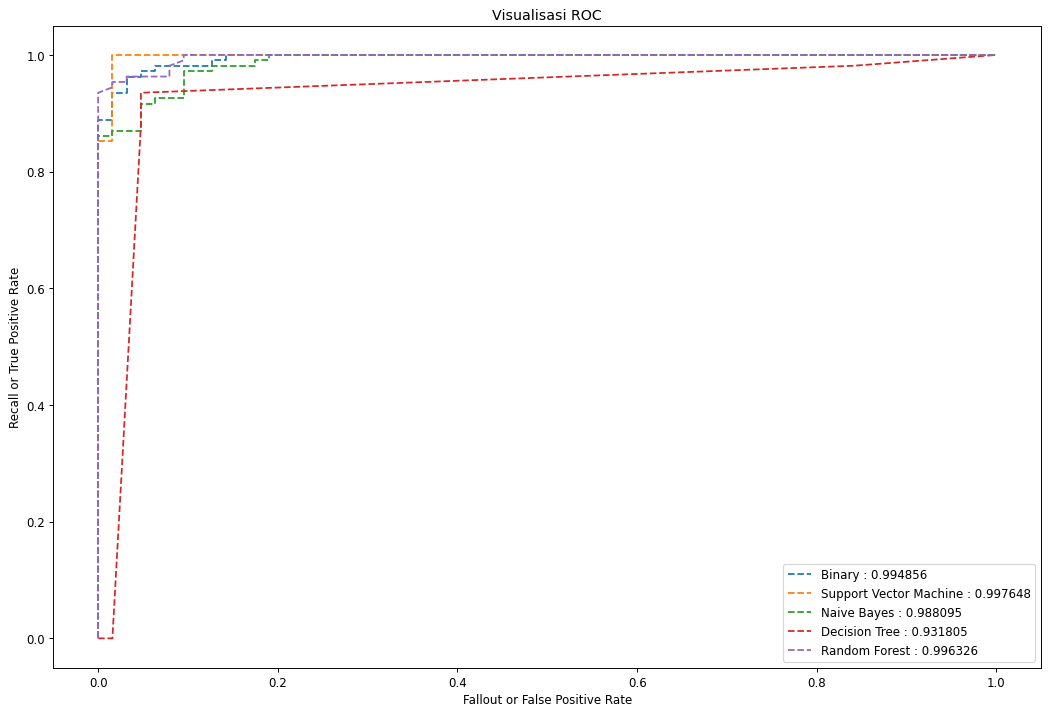

In [973]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize = (15, 10))
plt.plot(binary_fpr, binary_tpr, linestyle = '--', label= 'Binary : %0.6f' %binary_auc)
plt.plot(supportvector_fpr, supportvector_tpr, linestyle = '--', label = 'Support Vector Machine : %0.6f' %supportvector_auc)
plt.plot(naivebayes_fpr, naivebayes_tpr, linestyle = '--', label = 'Naive Bayes : %0.6f' %naivebayes_auc)
plt.plot(decisiontree_fpr, decisiontree_tpr, linestyle = '--', label = 'Decision Tree : %0.6f' %decisiontree_auc)
plt.plot(randomforest_fpr, randomforest_tpr, linestyle = '--', label = 'Random Forest : %0.6f' %randomforest_auc)

plt.title('Visualisasi ROC')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()